<h1><strong>케라스로 버트 빠르게 돌려보기 With 네이버 영화 감성분석</strong></h1>

<p> 본 튜토리얼에서는 아주 쉬운 인공지능 프로그램인 케라스를 활용하여 자연어 처리에 뛰어난 성적을 보여주고 있는<br>버트 모형을 파인튜닝하여 <strong>네이버 영화 댓글 감성분석</strong>을 실습해보고자 합니다.<br>
본 실습에서는 버트 모형을 활용하여 댓글이 긍정적인지 부정적인지 예측하는 인공지능을 생성합니다.<br>
케라스를 활용하여 아주 쉽게 BERT 모형을 훈련시킬 수 있습니다.</p>

튜토리얼을 만들기 위해 https://pypi.org/project/keras-bert/ 등을 참조하였습니다.

<h2><strong> 1. 버트 모형 소개 </strong></h2>
<p> 버트 모형은 2018년 11월 구글이 공개한 인공지능(AI) 언어 모델로써 기존 자연어 모델의 성능을 가볍게 뛰어넘었으며, 일부 성능 평가에서는 인간보다 더 높은 성능을 기록한 모델입니다.<br>
버트 모형의 특징은 <strong>사전학습, 문맥학습, 파인튜닝</strong>을 들 수 있습니다.<br>
<br><strong>(사전학습)</strong> 위키피디아 같은 아주 큰 데이터들을 사용하여 '언어 이해' 모델을 사전학습(Pre-training)한다. 광범위한 데이터로 인간이 살아오면서 체득한 지식과 같이 다양한 데이터를 학습하게 됩니다.<br>
<strong>(문맥학습1)</strong> 문장 순서를 학습하여 다음에 나온 문장이 순서에 맞는 문장인지 학습합니다.<br><br>&nbsp;&nbsp;=>  문장1: 저 남자는 회사에 출근했다<br>&nbsp;&nbsp;=>  문장2: 회사에 출근하자마자 저 남자는 커피를 끓여 마셨다.<strong>    (순서가 맞음)</strong><br><br>&nbsp;&nbsp;=> 문장3: 저 여자는 퇴근하려 한다.<br>&nbsp;&nbsp;=> 문장4: 강아지는 예쁘다.<strong>    (순서가 틀린 문장)</strong><br><br><strong>(문맥학습2)</strong> 양방향으로 학습하여 가려진 단어를 맞춘다.<br>&nbsp;&nbsp;&nbsp;&nbsp;문장 : 저 남자는 (①)에 출근했다. 회사에 출근하자마자 저 남자는 (②)를 마셨다.<br>&nbsp;&nbsp;=> ① : 회사 ② : 커피<br><br><strong>(파인튜닝)</strong> 이미 사람처럼 광범위한 글을 학습한 인공지능을 기반으로 하여 새로운 과제를 해결하게 됩니다. 이미 기반 지식이 있기 때문에 새로운 것을 쉽고 빠르게 학습할 수 있습니다.<br>
본 실습에서는 네이버 영화 평가 댓글로 긍정 부정인지를 예측하는 버트 모형을 생성해 보겠습니다.</p>




<h2><strong>2. 버트라는 도구를 활용하여 네이버 영화 평가 댓글 긍정 부정 예측하기</strong></h2>

<p> 버트라는 모형에 영화를 평가하는 댓글을 인풋으로 넣으면 댓글이 긍정인지 부정인지를 예측하게 됩니다. 긍정에 가까우면 0을, 부정에 가까우면 1을 출력하게 됩니다.<br>
함수로 표현하면 버트 모형 함수 <strong>function(영화댓글) = 1 or 0</strong>입니다.<br>
그림으로 살펴보도록 하겠습니다.</p>

![대체 텍스트](https://drive.google.com/uc?id=1XnskShDWXjG3TMPSyxHMPNdwNnhqXTLH)

<p> 네이버 영화 감성분석을 위해 파일을 불러왔습니다. 긍정은 0, 부정은 1로 라벨링 되어 있습니다. 이 데이터를 활용하여 댓글을 인풋으로 넣으면 긍정인지 부정인지 예측하는 값을 예측하는 인공지능 모형을 생성합니다.<br> 본 실습에서는 광범위한 데이터로 사전 훈련된 인공지능 모형을 네이버 영화 감성 분석 데이터로 파인튜닝(추가학습)하여 아래 그림과 같은 긍정 부정을 예측하는 모형을 만들고자 합니다.</p>

![대체 텍스트](https://drive.google.com/uc?id=1U6IxlXtN7LRVbmuFeqUWo-uoZPCNAMIZ)



<h2><strong>3. 버트 사전학습 모형 가져오기</strong></h2>

https://github.com/google-research/bert 에 접속하셔서 BERT-Base, Multilingual Cased: 104 languages, 12-layer, 768-hidden, 12-heads, 110M parameters 파일을 다운 받으시길 바랍니다.

![대체 텍스트](https://drive.google.com/uc?id=1jp1GNJkHRX9hGEzRgFgJGCnPvMq_YFBA)

<p>사전 학습 모형을 다운 받으셨다면, Colab에서 활용하기 위해 구글 GDRIVE에 업로드 하시길 바랍니다.</p>

![대체 텍스트](https://drive.google.com/uc?id=1lPbAQ9i2cOiBQ9f8T33nftNBKUCniEip)



<p> 누구나 쉽게 실습할 수 있도록 구글 Colaboratory를 활용하였습니다<br> <u>런타임->런타임 유형 변경에서 GPU를 꼭 선택하시기 바랍니다.</u><br>
그리고 데이터는 구글 G드라이브에 넣어 두었습니다. 사정에 맞게 폴더 경로를 변경하시기 바랍니다.</p>


<h1><strong>본격적으로 케라스와 버트를 활용하여 네이버 영화 댓글 감성 분석 예측을 하겠습니다</strong></h1>

구글 드라이브와 Colab을 연동합니다




In [4]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Colab에서 Bert 모형을 가지고 있는 폴더를 지정해줍니다<br>
파이썬 명령어 os.listdir(path)를 활용하여 폴더가 잘 있는지 확인하면서 진행합니다.

In [0]:
path = "gdrive/My Drive/Colab Notebooks/naver_sentiment"

텐서플로우, 판다스, 넘파이, 케라스 등 필요한 모듈들을 임포트합니다

In [6]:
import tensorflow as tf

import pandas as pd
import numpy as np  
import re
import pickle

import keras as keras
from keras.models import load_model
from keras import backend as K
from keras import Input, Model
from keras import optimizers

import codecs
from tqdm import tqdm
import shutil

Using TensorFlow backend.


케라스에서 Bert 활용을 쉽게 만들어주는 모듈 keras-bert를 설치합니다<br>그리고 Adam optimizer의 수정판인 keras-radam 모듈을 임포트합니다.

In [7]:
!pip install keras-bert
!pip install keras-radam

keras-bert 라이브러리에서 버트 모형 활용에 필요한 모듈들을 임포트합니다

In [0]:
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

from keras_radam import RAdam

폴더를 복사하는 함수를 정의합니다. Bert 모델은 현재 GDrive 상에 있습니다. **Colab 클라우드 컴퓨터 안에 Bert 모형을 직접 저장하면, GDRive를 경유하는 것보다 사전학습된 모델을 로드하는 시간이 빨라집니다.**

In [0]:
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

Colab 클라우드 서버에 bert라는 폴더를 생성합니다.

In [0]:
os.makedirs("bert")

bert 폴더에 구글에서 다운받았던 bert 사전학습 모델, vocab.txt등의 파일을 G드라이버에서 클라우드 내부로 복사합니다

In [0]:
copytree(os.path.join(path,"bert"), "bert")

네이버 영화 감성분석 데이터를 다운로드 합니다

In [0]:
# 네이버 영화 감성분석 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 15.69 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


nsmc 폴더에 네이버 감성분석 데이터가 다운로드 됩니다. 파일이 잘 있는지 확인해 봅니다

In [11]:
os.listdir("nsmc")

['raw',
 'code',
 'ratings.txt',
 'ratings_test.txt',
 '.git',
 'ratings_train.txt',
 'README.md',
 'synopses.json']

버트 모형을 훈련시킬 train 데이터와 test데이터를 pandas 테이블 형식으로 로드합니다

In [0]:
train = pd.read_table("nsmc/"+"ratings_train.txt")
test = pd.read_table("nsmc/"+"ratings_test.txt")

네이버 감성분석을 위한 훈련 데이터가 잘 로드되었습니다.
document 칼럼에는 문장이, label 칼럼에는 긍정(0) 부정(1)이 들어갑니다.

In [13]:
train.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


<ul>
<li>bert 훈련을 위한 사전 설정을 합니다. SEQ_LEN은 문장의 최대 길이입니다. SEQ_LEN 보다 문장의 길이가 작다면 남은 부분은 0이 채워지고, 만약에 SEQ_LEN보다 문장 길이가 길다면 SEQ_LEN을 초과하는 부분이 잘리게 됩니다.</li><li>BATCH_SIZE는 메모리 초과 같은 문제를 방지하기 위해 작은 수인 16으로 정했습니다. 그리고 총 훈련 에포크 수는 2로 정했습니다. 학습율(LR;Learning rate)은 1e-5로 작게 정했습니다.</li><li>pretrained_path는 bert 사전학습 모형이 있는 폴더를 의미합니다.<br>그리고 우리가 분석할 문장이 들어있는 칼럼의 제목인 document와 긍정인지 부정인지 알려주는 칼럼을 label로 정해줍니다</li></ul>


In [0]:
SEQ_LEN = 128
BATCH_SIZE = 16
EPOCHS=2
LR=1e-5

pretrained_path ="bert"
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = "document"
LABEL_COLUMN = "label"

vocab.txt에 있는 단어에 인덱스를 추가해주는 token_dict라는 딕셔너리를 생성합니다. 우리가 분석할 문장이 토큰화가 되고, 그 다음에는 인덱스(숫자)로 변경되어서 버트 신경망에 인풋으로 들어게 됩니다.

In [0]:
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        if "_" in token:
          token = token.replace("_","")
          token = "##" + token
        token_dict[token] = len(token_dict)

In [16]:
token_dict

{'[PAD]': 0,
 '[unused1]': 1,
 '[unused2]': 2,
 '[unused3]': 3,
 '[unused4]': 4,
 '[unused5]': 5,
 '[unused6]': 6,
 '[unused7]': 7,
 '[unused8]': 8,
 '[unused9]': 9,
 '[unused10]': 10,
 '[unused11]': 11,
 '[unused12]': 12,
 '[unused13]': 13,
 '[unused14]': 14,
 '[unused15]': 15,
 '[unused16]': 16,
 '[unused17]': 17,
 '[unused18]': 18,
 '[unused19]': 19,
 '[unused20]': 20,
 '[unused21]': 21,
 '[unused22]': 22,
 '[unused23]': 23,
 '[unused24]': 24,
 '[unused25]': 25,
 '[unused26]': 26,
 '[unused27]': 27,
 '[unused28]': 28,
 '[unused29]': 29,
 '[unused30]': 30,
 '[unused31]': 31,
 '[unused32]': 32,
 '[unused33]': 33,
 '[unused34]': 34,
 '[unused35]': 35,
 '[unused36]': 36,
 '[unused37]': 37,
 '[unused38]': 38,
 '[unused39]': 39,
 '[unused40]': 40,
 '[unused41]': 41,
 '[unused42]': 42,
 '[unused43]': 43,
 '[unused44]': 44,
 '[unused45]': 45,
 '[unused46]': 46,
 '[unused47]': 47,
 '[unused48]': 48,
 '[unused49]': 49,
 '[unused50]': 50,
 '[unused51]': 51,
 '[unused52]': 52,
 '[unused53]': 53

Tokenizer 클래스를 상속받아서 inherit_Tokennizer라는 클래스를 재정의하고 _tokenize 함수를 새로 작성합니다.왜 상속을 해서 함수를 새로 만들어야 하냐면, 만약 원래 클래스를 그대로 사용하면 입력한 문장이 "완전자모분리"됩니다. 예를 들어서 "인공지능 할 수 있다" 라는 문장이 있다면 원래 "인,##공,##지,##능,할,수,있다"로 분해가 되어야 하는데, ㅇ,##ㅣ,##ㄴ,ㄱ,##ㅗ,##ㅇ,ㅈ,##ㅣ,##ㄴ,##ㅡ,##ㅇ 이런 식으로 토큰화가 됩니다.

두칸 아래에서 보시겠지만, inherit_Tokenizer클래스는 문장을 토큰화하는 기능을 합니다. 

BERT의 토큰화는 단어를 분리하는 토큰화 방식입니다. wordpiece(단어조각?) 방식이라고 하는데, 이는 한국어를 형태소로 꼭 변환해야 할 문제를 해결해주며, 의미가 있는 단어는 밀접하게 연관이 되게 하는 장점까지 갖추고 있습니다.
단어의 첫 시작은 ##가 붙지 않지만, 단어에 포함되면서 단어의 시작이 아닌 부분에는 ##가 붙는 것이 특징입니다.

In [0]:
class inherit_Tokenizer(Tokenizer):
  def _tokenize(self, text):
        if not self._cased:
            text = text
            
            text = text.lower()
        spaced = ''
        for ch in text:
            if self._is_punctuation(ch) or self._is_cjk_character(ch):
                spaced += ' ' + ch + ' '
            elif self._is_space(ch):
                spaced += ' '
            elif ord(ch) == 0 or ord(ch) == 0xfffd or self._is_control(ch):
                continue
            else:
                spaced += ch
        tokens = []
        for word in spaced.strip().split():
            tokens += self._word_piece_tokenize(word)
        return tokens

In [0]:
tokenizer = inherit_Tokenizer(token_dict)

토큰화가 잘 되었는지 확인해 봅니다.
버트 모형은 문장 앞에 꼭 [CLS]라는 문자가 위치하고, [SEP]라는 문자가 끝에 위치합니다. 
[CLS]는 문장의 시작, [SEP]는 문장의 끝을 의미합니다.

In [19]:
tokenizer.tokenize("케라스로 버트 해보기 정말 재밌음.")

['[CLS]',
 '케',
 '##라',
 '##스로',
 '버',
 '##트',
 '해',
 '##보',
 '##기',
 '정',
 '##말',
 '재',
 '##밌',
 '##음',
 '.',
 '[SEP]']

우리가 로드하였던 네이버 영화 댓글 감성분석 데이터를 버**트 모형의 입력에 맞게 변형해주는** 함수를 정의합니다.

함수 내부에 tokenizer.encode 함수가 버트 모형을 토큰화해주고 토큰화 된 단어를 인덱스에 맞게 숫자로 바꿔주게 됩니다. 

In [0]:
def convert_data(data_df):
    global tokenizer
    indices, targets = [], []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer.encode(data_df[DATA_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        targets.append(data_df[LABEL_COLUMN][i])
    items = list(zip(indices, targets))
    
    indices, targets = zip(*items)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)], np.array(targets)

def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    
    
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)


    data_x, data_y = convert_data(data_df)

    return data_x, data_y

In [21]:
train_x, train_y = load_data(train)
test_x, test_y = load_data(test)

100%|██████████| 50000/50000 [00:06<00:00, 7519.80it/s]


사전학습된 버트 모델의 인풋은 문장 토큰화가 숫자로 바뀐 것과, 앞문장인지 뒷문장인지 알려주는 문장 순서 벡터가 들어갑니다. 우리는 문장 하나를 가지고만 훈련할 것이므로 순서 벡터는 모두 0으로 통일합니다.

그리고 파인튜닝 시에는 문장 안에 일부 단어를 가리는 마스킹은 사용하지 않습니다.

In [22]:
train_x

[array([[  101,  9519,  9074, ...,     0,     0,     0],
        [  101,   100,   119, ...,     0,     0,     0],
        [  101,  9004, 32537, ...,     0,     0,     0],
        ...,
        [  101,  9638, 14153, ...,     0,     0,     0],
        [  101,  9751, 97707, ...,     0,     0,     0],
        [  101, 48556, 42428, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

**버트 모형에 들어갈 인풋은 토큰 임베딩, 세그먼트 임베딩이라고 해서 문장이 앞의 문장인지 뒤의 문장인지를 구분해주는 임베딩, 마지막으로 포지션 임베딩으로 구성됩니다.**

![대체 텍스트](https://drive.google.com/uc?id=1FMQLCpSinqqfqJcU4DnIBT6TblgGmBjh)

이해가 안 가실 수 있는데, 버트 인풋을 문장으로 예를 들어 만들어 보겠습니다.
인풋은 총 2개가 들어갑니다
* (토큰 엠베딩)첫번째 인풋은 토큰화 된 것이 인덱싱되어 숫자로 변환된 것
* (세그멘트 임베딩) 두번째 인풋은 앞문장인지 뒷문장인지 알려주는 숫자들입니다. 파인튜닝 과정이라 앞문장 뒷문장 구분을 안하기 때문에 모두 0으로 하였습니다.
* (포지션 임베딩) 단어 순서에 따라서 자동으로 부여됩니다.


In [0]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data))):
        print(tokenizer.tokenize(data[i]))
        ids, segments = tokenizer.encode(data[i], max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def sentence_load_data(sentences):#sentence는 List로 받는다
           
    data_x = sentence_convert_data(sentences)

    return data_x

In [24]:
sentence_load_data(["케라스로 버트 해보기 정말 재밌음", "케라스 쉬워 쉬워"])

100%|██████████| 2/2 [00:00<00:00, 1158.49it/s]

['[CLS]', '케', '##라', '##스로', '버', '##트', '해', '##보', '##기', '정', '##말', '재', '##밌', '##음', '[SEP]']
['[CLS]', '케', '##라', '##스', '쉬', '##워', '쉬', '##워', '[SEP]']


[array([[  101,  9806, 17342, 94980,  9336, 15184,  9960, 30005, 12310,
          9670, 89523,  9659,   100, 32158,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,

이해가 되셨는지요?

구글 깃허브에서 다운받았던 사전학습된 모델을 colab으로 로드합니다.

In [25]:
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN,)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









모델의 구조를 확인합니다. 총 12층의 트랜스포머 계층이 있음을 확인할 수 있습니다.


In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 128)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

가장 중요한 부분인데요, 사전학습 파일을 로드하여, 우리가 불러들였던 사전학습 모델을 변형해줍니다.
input으로는 우리가 문장을 토큰화 하여 숫자로 변형시켜주었던 문장 벡터와, 앞문장인지 뒷문장인지 알려주는 순서 벡터 두 가지를 정의합니다.
즉 인풋은 inputs = modle.inputs[:2]로 정의하였습니다.

그리고 output은 일단 사전학습 모델을 약간 잘라줍니다.(outputs=Dense(1)) 맨 위 3층을 잘라 낸다음에 잘라낸 부분에 긍정인지 부정인지 알려주는 Dense(1)을 사전학습 모델에 애드온 시켜 줍니다.
Dense(1)은 아웃풋이 하나로, 문장이 긍정에 가까우면 0에 가까운 값을, 부정에 가까우면 1에 가까운 값을 출력해주는 레이어입니다.

그리고 사전 설치하였던 Radam을 활용하여 deep learning의 기울기 강하 훈련을 하도록 정해줍니다. 그 다음에 bert_model을 return해 줍니다.

In [0]:
def get_bert_finetuning_model(model):
  inputs = model.inputs[:2]
  dense = model.layers[-3].output


  outputs = keras.layers.Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                              name = 'real_output')(dense)



  bert_model = keras.models.Model(inputs, outputs)
  bert_model.compile(
      optimizer=RAdam(learning_rate=0.00001, weight_decay=0.0025),
      loss='binary_crossentropy',
      metrics=['accuracy'])
  
  return bert_model
  

<h2>모델의 FLOW를 확인해 보도록 하겠습니다.</h2>

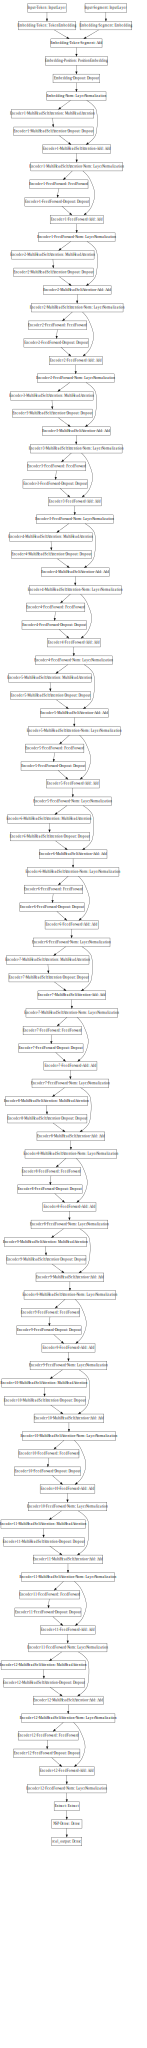

In [41]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(bert_model, dpi=65).create(prog='dot', format='svg'))


bert_model을 get_bert_finetuning_model 함수로 불러들입니다.
이 다음에 bert_model.fit을 활용하여 버트 모형 파인튜닝을 시작하게 됩니다.
실시간으로 테스트 데이터에 대한 정확도를 알기 위해 validation_data = (test_x, test_y)로 정하였습니다.

2 에포크 만에 정확도가 88.19%에 도달함을 알 수 있습니다.
만약에 ETRI에서 만든 한국어로 학습된 BERT 모형을 사용하면 정확도가 90%가 넘기도 합니다.(조만간 ETRI BERT를 활용하여 정확도 높이는 기법도 알려 드리겠습니다.)
사실 아무 전처리 없이 네이버 감성분석의 정확도가 2 에포크 만에 88.19%가 나온 것은 상당히 고무적인 것입니다. 

BiLSTM 이나 어텐션 기법을 사용했을 시 보통 테스트셋에 대한 정확도가 86.5% 정도입니다.

In [28]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init_op = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init_op)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(train_x, train_y, epochs=2, batch_size=16, verbose = 1, validation_data=(test_x, test_y), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Train on 150000 samples, validate on 50000 samples
Epoch 1/2
150000/150000 [==============================] - 3238s 22ms/step - loss: 0.3670 - acc: 0.8336 - val_loss: 0.3004 - val_acc: 0.8720
Epoch 2/2
150000/150000 [==============================] - 3220s 21ms/step - loss: 0.2682 - acc: 0.8865 - val_loss: 0.2831 - val_acc: 0.8802


재사용을 위해 bert_model을 지드라이브에 저장해줍니다.

In [0]:
bert_model.save_weights(path+"/bert.h5")

버트 모형을 로드해줍니다. 이미 로드하였던 모델에 계수들만 살짝 얹혀 줍니다.

In [0]:
bert_model = get_bert_finetuning_model(model)
bert_model.load_weights(path+"/bert.h5")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


파인튜닝한 버트 모형에 test 데이터 셋을 넣어 평가해 봅니다.
사실 머신러닝에서는 정확도인 accuracy도 중요하지만, F1 score가 상당히 중요합니다.

**긍정문장으로 판별된 문장이 진짜로 긍정 문장에 속할 확률**<br>
**부정문장으로 판별된 문장이 진짜로 부정 문장에 속할 확률**<br> 이 두가지를 고려한 종합적인 성능이 F1 score입니다.

한번 F1-score를 확인해 보겠습니다.


<h3>먼저 테스트 데이터를 버트 모형에 넣을 수 있도록 predict_convert_data 함수를 정의해줍니다. <br> 위에 정의한 convert_data 함수와 다른 점은, test 데이터이기 때문에 label은 고려하지 않는다는 점입니다</h3>

In [0]:
def predict_convert_data(data_df):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer.encode(data_df[DATA_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    
    
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def predict_load_data(x): #Pandas Dataframe을 인풋으로 받는다
    data_df = x
    
    
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)


    data_x = predict_convert_data(data_df)

    return data_x

In [0]:
test.head(3)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [0]:
test_set = predict_load_data(test)

100%|██████████| 50000/50000 [00:06<00:00, 8082.41it/s]


In [0]:
test_set

[array([[  101,  8911,   100, ...,     0,     0,     0],
        [  101,   175, 54998, ...,     0,     0,     0],
        [  101,  9303, 21711, ...,     0,     0,     0],
        ...,
        [  101,  8924, 67527, ...,     0,     0,     0],
        [  101,  9666, 14423, ...,     0,     0,     0],
        [  101,  9246, 32537, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

<h2><strong>테스트 셋으로 예측하기</strong></h3>

In [0]:
#예측
preds = bert_model.predict(test_set)

In [0]:
# 부정이면 1, 긍정이면 0 출력
preds

array([[0.993587  ],
       [0.6564824 ],
       [0.62195325],
       ...,
       [0.7552352 ],
       [0.00427142],
       [0.3131508 ]], dtype=float32)

In [0]:
from sklearn.metrics import classification_report

In [0]:
y_true = test['label']
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     24827
           1       0.88      0.88      0.88     25173

    accuracy                           0.88     50000
   macro avg       0.88      0.88      0.88     50000
weighted avg       0.88      0.88      0.88     50000



F1 스코어와 Accuracy가 거의 비슷함을 알 수 있습니다. 훈련이 치우치지 않고 잘 됐음을 알 수 있습니다.

한번 케라스의 장점을 살려 볼까요?
케라스의 장점은 모델을 쉽게 자르고 붙일 수 있다는 점 같습니다<br>
마지막 768개의 피처 부분을 잘라내서, 긍정 영화 평가와 부정 영화 평가의 플롯을 한번 그려보고 상호간 기하학적 관계를 살펴보도록 하겠습니다.<br>

먼저, 마지막 768개 피처를 추출하는 함수를 정의합니다
이번에는 아웃풋이 0과 1 사이의 값이 아닌, 768개의 값을 반환하게 됩니다. 

In [0]:
def get_feature_map(model):
  inputs = model.input
  outputs = model.layers[-2].output
  feature_model = Model(inputs, outputs)
  return feature_model

In [0]:
bert_feature = get_feature_map(bert_model)

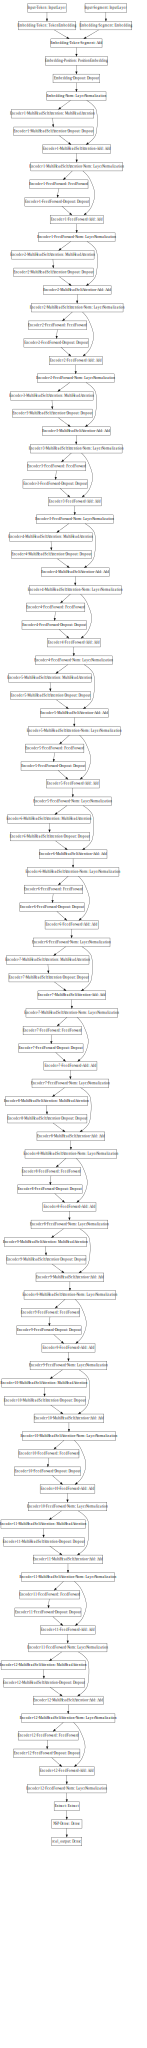

In [43]:
SVG(model_to_dot(bert_model, dpi=65).create(prog='dot', format='svg'))

마지막에 보시면 768개의 피처가 반환되게 됩니다.

테스트 데이터의 피처들을 반환하고, TSNE 임베딩 플롯을 그려보도록 하겠습니다.

In [0]:
bert_weight_list = bert_feature.predict(test_set)

In [0]:
bert_weight_list

array([[ 0.6768613 , -0.34577873, -0.44642594, ..., -0.46659446,
         0.4760487 ,  0.554863  ],
       [ 0.63960963, -0.21447237,  0.3751952 , ..., -0.75756145,
         0.54507357,  0.64565605],
       [ 0.6462688 , -0.22030291,  0.29965237, ..., -0.76921386,
         0.4767284 ,  0.5631936 ],
       ...,
       [ 0.6250664 , -0.18705241, -0.0571351 , ..., -0.67899805,
         0.45182475,  0.4458032 ],
       [-0.75391245,  0.4165041 ,  0.3838565 , ...,  0.37433255,
        -0.4284077 , -0.4931942 ],
       [ 0.418387  ,  0.01214304,  0.23017944, ..., -0.6176592 ,
         0.23473784,  0.35688388]], dtype=float32)

In [0]:
labels = test['label']

In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

마지막 768 차원을 PCA를 사용하여 256차원으로 줄여줍니다.<br>
그 다음 TSNE 알고리즘을 활용하여 3차원으로 축소해 줍니다.<br>
TSNE 알고리즘은 같은 것은 묶어주고, 다른 것은 흩어 지게 해주는 역할을 합니다.

In [0]:
bert_embedded = PCA(n_components=256).fit_transform(bert_weight_list)
bert_embedded = TSNE(n_components=3).fit_transform(bert_embedded)
bert_embedded

array([[-15.254069 ,  12.572834 ,  -2.8383455],
       [ -1.8160225, -17.949944 ,  -3.7903683],
       [ -3.7930512, -13.10499  ,  -1.4318625],
       ...,
       [ -2.2158408,  -5.778054 ,   5.1145797],
       [  6.4387045, -12.531628 ,  -9.399321 ],
       [-14.548854 ,  -1.8416196,   8.593951 ]], dtype=float32)

bert 임베딩을 pickle 모듈을 활용하여 저장해 줍니다.<br>
추후 재사용에 쓸 예정입니다.<br>

In [0]:
with open(path+"/bertembedding.pkl", "wb") as f:
  pickle.dump(bert_embedded, f)

저장하였던 임베딩 파일을 로드합니다.

In [0]:
with open(path+"/bertembedding.pkl", "rb") as f:
  bert_embedded = pickle.load(f)

3D로 그리기 위해 matplotlib 모듈들을 로드합니다.

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import seaborn as sns

In [48]:
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [0]:
def get_tsne_plot(rot1=-20, rot2=100):
  fig = plt.figure(figsize=(5,5))
  ax = Axes3D(fig)
  colors = 'b', 'r'
  labels = 0, 1
  for i, c, label in zip(range(np.shape(bert_embedded)[0]), colors, labels):
    ax.scatter(bert_embedded[test['label']==label,0], bert_embedded[test['label']==label,1], bert_embedded[test['label']==label,2], s=2, c=c, alpha=0.5)
  ax.view_init(rot1, rot2)
  print("rot1:%d" % rot1, "rot2:%d" % rot2)
  plt.legend(labels, loc='upper right')
  plt.show()

긍정(0)과 부정(1)의 임베딩이 잘 되는지 확인해 봅니다.
긍정구간과 부정구간이 잘 나뉨을 확인할 수 있습니다.

In [50]:
import time
for j in range(-180, 180, 45):
  for i in range(-180,180,45):
  
    get_tsne_plot(i, j)


Output hidden; open in https://colab.research.google.com to view.